# **Extracting Stock Data Using a Python Library**
Created on Wed Aug 3 08:00:12 2022

@author: David K. Jeremiah

## **Introduction**
A company's [stock](https://www.investopedia.com/terms/s/stock.asp) share is a piece of the company, more precisely.

A stock (also known as [equity](https://www.investopedia.com/terms/e/equity.asp#:~:text=Equity%20represents%20the%20value%20that,debts%20associated%20with%20that%20asset) is a security that represents the ownership of a fraction of a corporation. This entitles the owner of the stock to a proportion of the corporation's assets and profits equal to how much stock they own. Units of stock are called "shares."

An investor can buy a stock and sell it later. If the stock price increases, the investor profits, If it decreases,the investor with incur a loss. Determining the stock price is complex; it depends on the number of outstanding shares, the size of the company's future profits, and much more.

## **Objective**
In this lab we will extract stock data using a Python library. 

We will use the `yfinance` library. It allows us to extract information about the stocks - returning data in a pandas dataframe.

## **Table of Contents**
* Using yfinance to Extract Stock Info
* Using yfinance to Extract Historical Share Price Data
* Using yfinance to Extract Historical Dividends Data

In [1]:
# install the yfinance library
!pip3 install yfinance==0.1.67

In [2]:
# import the necessary libraries
import yfinance as yf
import pandas as pd

## **Using the yfinance Library to Extract Stock Data**
***Note:*** We have what we call as the [stock ticker](https://www.investopedia.com/ask/answers/12/what-is-a-stock-ticker.asp#:~:text=A%20stock%20ticker%20is%20a,movement%20is%20up%20or%20down), which is a report of the price of a certain stock, updated continuously throughout the trading session by the various stock market exchanges. The y-finance API is used to obtain the stock ticker and extract information about the stock. 

Using the `Ticker` module from the yfinance library, we can create an object that will allow us to access functions to extract data. To do this we need to provide the ticker symbol for the stock, here the company is `Apple` and the ticker symbol is `AAPL`.

In [13]:
# For Apple stock
apple = yf.Ticker("AAPL")

In [14]:
print(apple)

yfinance.Ticker object <AAPL>


Now we can access functions and variables to extract the type of data we need.

### **Stock Info**
Using the attribute `info` we can extract information about the stock as a Python dictionary.

In [15]:
apple_info = apple.info
print(apple_info)

{'zip': '95014', 'sector': 'Technology', 'fullTimeEmployees': 154000, 'longBusinessSummary': 'Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with o

We can get to know more about the company using the `'longBusinessSummary'` key

In [16]:
# summary about the company
print(apple_info['longBusinessSummary'])

Apple Inc. designs, manufactures, and markets smartphones, personal computers, tablets, wearables, and accessories worldwide. It also sells various related services. In addition, the company offers iPhone, a line of smartphones; Mac, a line of personal computers; iPad, a line of multi-purpose tablets; AirPods Max, an over-ear wireless headphone; and wearables, home, and accessories comprising AirPods, Apple TV, Apple Watch, Beats products, HomePod, and iPod touch. Further, it provides AppleCare support services; cloud services store services; and operates various platforms, including the App Store that allow customers to discover and download applications and digital content, such as books, music, video, games, and podcasts. Additionally, the company offers various services, such as Apple Arcade, a game subscription service; Apple Music, which offers users a curated listening experience with on-demand radio stations; Apple News+, a subscription news and magazine service; Apple TV+, whi

### **Extracting Share Price**
A [share](https://www.investopedia.com/terms/s/shares.asp) is the single smallest part of a company's stock that you can buy. The prices of these shares fluctuate over time. 

Using the `history()` method we can get the share price of the stock over a certain period of time. 

Using the period parameter we can set how far back from the present to get data. The options for period are 1 day (1d), 5d, 1 month (1mo) , 3mo, 6mo, 1 year (1y), 2y, 5y, 10y, ytd, and max.

In [17]:
apple_share_price_data = apple.history(period="max")

The format that the data is returned in, is a Pandas DataFrame. With the Date as the index, and the share `Open`, `High`, `Low`, `Close`, `Volume`, and `Stock Splits` are given for each day, as columns.

In [18]:
# print the first 5 rows
print(apple_share_price_data.head())

                Open      High       Low     Close     Volume  Dividends  \
Date                                                                       
1980-12-12  0.100178  0.100614  0.100178  0.100178  469033600        0.0   
1980-12-15  0.095388  0.095388  0.094952  0.094952  175884800        0.0   
1980-12-16  0.088418  0.088418  0.087983  0.087983  105728000        0.0   
1980-12-17  0.090160  0.090596  0.090160  0.090160   86441600        0.0   
1980-12-18  0.092774  0.093210  0.092774  0.092774   73449600        0.0   

            Stock Splits  
Date                      
1980-12-12           0.0  
1980-12-15           0.0  
1980-12-16           0.0  
1980-12-17           0.0  
1980-12-18           0.0  


We can reset the index of the DataFrame with the `reset_index` function. We also set the `inplace` parameter to `True` so the change takes place to the DataFrame itself.

In [19]:
apple_share_price_data.reset_index(inplace=True)

print(apple_share_price_data.head())

        Date      Open      High       Low     Close     Volume  Dividends  \
0 1980-12-12  0.100178  0.100614  0.100178  0.100178  469033600        0.0   
1 1980-12-15  0.095388  0.095388  0.094952  0.094952  175884800        0.0   
2 1980-12-16  0.088418  0.088418  0.087983  0.087983  105728000        0.0   
3 1980-12-17  0.090160  0.090596  0.090160  0.090160   86441600        0.0   
4 1980-12-18  0.092774  0.093210  0.092774  0.092774   73449600        0.0   

   Stock Splits  
0           0.0  
1           0.0  
2           0.0  
3           0.0  
4           0.0  


We can plot the `Open` price against the `Date`:

<AxesSubplot:xlabel='Date'>

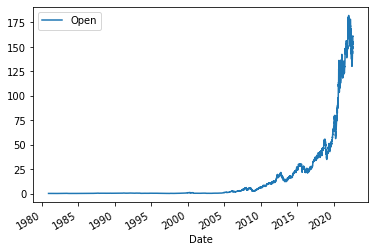

In [20]:
apple_share_price_data.plot(x="Date", y="Open")

### **Extracting Dividends**
`Dividends` are the distribution of a company's profits to shareholders. In this case they are defined as an amount of money returned per share an investor owns. Using the variable dividends we can get a dataframe of the data. The period of the data is given by the period defined in the `history` function.

In [21]:
apple.dividends

Date
1987-05-11    0.000536
1987-08-10    0.000536
1987-11-17    0.000714
1988-02-12    0.000714
1988-05-16    0.000714
                ...   
2021-05-07    0.220000
2021-08-06    0.220000
2021-11-05    0.220000
2022-02-04    0.220000
2022-05-06    0.230000
Name: Dividends, Length: 75, dtype: float64

We can plot the dividends overtime:

<AxesSubplot:xlabel='Date'>

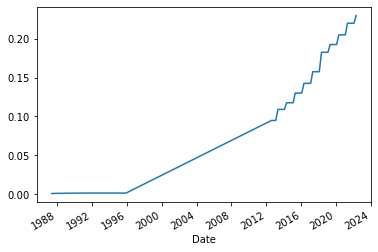

In [23]:
apple.dividends.plot()

Now using the Ticker module, let's create an object for AMD (Advanced Micro Devices) with the ticker symbol is `AMD` called; name the object `amd`.

In [30]:
# For Advanced Micro Devices
amd = yf.Ticker('AMD')

Using the key `country`, let's find the country the stock belongs to:

In [31]:
amd_country = amd.info['country']
print(amd_country)

United States


Using the key `sector` lets find the sector the stock belongs to:

In [32]:
amd_sector = amd.info['sector']
print(amd_sector)

Technology


Now, let's obtain stock data for AMD using the `history` function - setting the `period` to `max`. And we'll consider the Volume traded on the first day (first row).

In [41]:
amd_share_price_data = amd.history(period='max')

# reset index
amd_share_price_data.reset_index(inplace=True)

# print stock data
print(amd_share_price_data)

# print the volume traded the first day (first row)
print(amd_share_price_data.loc[[1,]])

        Date  Open   High     Low    Close  Volume  Dividends  Stock Splits
1 1980-03-18   0.0  3.125  2.9375  3.03125  727200          0           0.0
